<a href="https://colab.research.google.com/github/Nurulinsaniyuyun/42619018_PROJECT-UAS/blob/main/ProjectUAS_Deteksi_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#MENAMPILKAN ISI DARI FOLDER DATASET

In [4]:
!ls "../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray"

chest_xray  __MACOSX  test  train  val


#IMPORT LIBRARY YANG DIGUNAKAN

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from keras.models import Model
from keras.layers import Input,Conv2D,Dense,Dropout,MaxPool2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

#MEMBUAT FUNCTION UNTUK MEMBACA SEKALIGUS MERESIZE IMAGE DARI DATASET
CNN MEMBACA IMAGE YANG UKURANNYA SAMA
DISINI SAYA MERESIZE UKURAN 200 x 200 PX AGAR SIZENYA TIDAK TERLALU BESAR

In [5]:
def load_images(image_path):
  files = np.array(os.listdir(image_path))

  images = []
  for image in tqdm(files):
      #Read Image
      image = cv2.imread(image_path + image)
      #Resize image to 200 x 200 px
      image = cv2.resize(image,dsize=(200,200))
      images.append(image)

  images = np.array(images)

  return images

#PATH UNTUK LOADING IMAGE (NORMAL TRAIN,PNEU TRAIN, NORMAL TEST, PNEU TEST)

In [13]:
normal_train = load_images('../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/train/NORMAL/')
pneu_train = load_images('../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/train/PNEUMONIA/')

normal_test = load_images('../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/test/NORMAL/')
pneu_test = load_images('../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/test/PNEUMONIA/')

100%|██████████| 390/390 [00:08<00:00, 44.85it/s]


#MELIHAT SHAPE DARI MASING-MASING DATASET

In [14]:
print('Normal Train Shape\t:', normal_train.shape)
print('Pneumonia Train Shape\t:', pneu_train.shape)
print('Normal Test Shape\t:', normal_test.shape)
print('Pneumonia Test Shape\t:', pneu_test.shape)

Normal Train Shape	: (1341, 200, 200, 3)
Pneumonia Train Shape	: (3885, 200, 200, 3)
Normal Test Shape	: (234, 200, 200, 3)
Pneumonia Test Shape	: (390, 200, 200, 3)


#MENAMPILKAN X-RAY UNTUK ORANG YANG NORMAL

X-ray orang normal


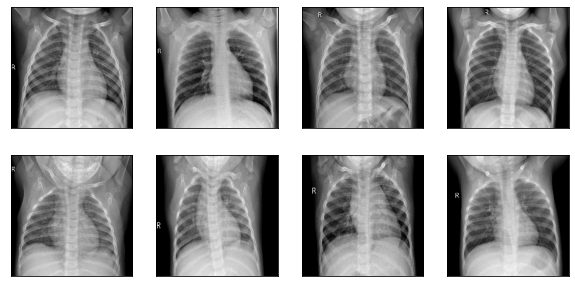

In [15]:
print('X-ray orang normal')
fig,axes = plt.subplots(ncols=4, nrows=2, sharex=False,
                        sharey=True, figsize=(10,5))
index = 10
for i in range(2):
  for j in range(4):
    axes[i,j].imshow(normal_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

# MENAMPILKAN X-RAY UNTUK YANG TERKENA PNEUMONIA
Untuk imshow kita menggunakan pneu_train utk data pneumonia
Sedikit perbedaan image dataset orang yang tidak terkena pneumonia dan terkena pneumonia dapat kita lihat pada rongga dadanya. Untuk orang normal lebih terang/ tajam dibanding yang terkena pneumonia cenderung lebih buram/kabur.

X-ray orang yang terkena pneumonia


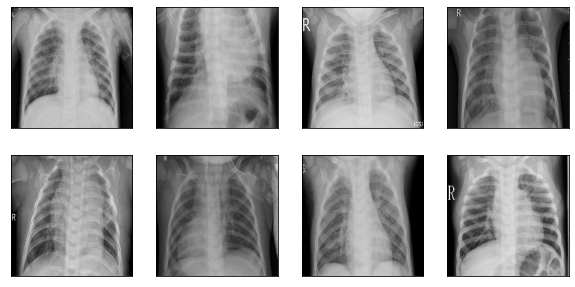

In [16]:
print('X-ray orang yang terkena pneumonia')
fig,axes = plt.subplots(ncols=4, nrows=2, sharex=False,
                        sharey=True, figsize=(10,5))
index = 100
for i in range(2):
  for j in range(4):
    axes[i,j].imshow(pneu_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

#KITA BUAT X_TRAIN DAN X_TEST DAN MENAMPILKAN DIMENSI/SHAPE DARI 2 BAGIAN TERSEBUT

In [17]:
X_train = np.vstack((normal_train,pneu_train))
X_test = np.vstack((normal_test,pneu_test))

print('X_train.shape\t:', X_train.shape)
print('X_test.shape\t:', X_test.shape)

X_train.shape	: (5226, 200, 200, 3)
X_test.shape	: (624, 200, 200, 3)


#KITA BUAT Y_TRAIN DAN Y_TEST DAN MENAMPILKAN DIMENSI/SHAPE DARI 2 BAGIAN TERSEBUT

In [18]:
y_train = np.append([0] * normal_train.shape[0], [1] * pneu_train.shape[0])
y_test= np.append([0] * normal_test.shape[0], [1] * pneu_test.shape[0])

print('y_train.shape\t:', y_train.shape)
print('y_test.shape\t:', y_test.shape)

y_train.shape	: (5226,)
y_test.shape	: (624,)


#LANGKAH SELANJUTNYA KITA SHUFFLE / ACAK DATASET UNTUK BAGIAN TRAIN DAN TEST

In [19]:
train = np.array(list(zip(X_train,y_train)))
test = np.array(list(zip(X_test,y_test)))

#shuffle
np.random.shuffle(train)
np.random.shuffle(test)

# X & Y train dipisah
X_train, y_train = zip(*train)
X_train = np.array(X_train)
y_train = np.array(y_train)

#X & Y test dipisah
X_test, y_test = zip(*test)
X_test= np.array(X_test)
y_test= np.array(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


#KITA MENGGUNAKAN IMAGEDATAGENERATOR KETIKA KITA MEMILIKI DATASET YANG SEDIKIT / KECIL.
UNTUK MELATIH DATA DENGAN ROTATE,ZOOM,WIDTH DAN HEIGHT NYA DIMAINKAN AGAR SEOLAH-OLAH IMAGE DATASET NYA LEBIH BANYAK

In [20]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1 
)

#KITA FIT KAN DATAGEN UNTUK MENYIMPAN IMAGEDATAGENERATOR DAN DIGUNAKAN UNTUK X_TRAIN

In [21]:
datagen.fit(X_train)

#MEMBUAT INPUT1 DAN MEMBUAT SHAPE 200 X 200

In [22]:
input1 = Input(shape=(200,200,3))

#MENDESKRIPSIKAN CNN

In [23]:
cnn = Conv2D(16,(3,3),activation='relu',strides=(1,1),padding='same')(input1)
cnn = Conv2D(32,(3,3),activation='relu',strides=(1,1),padding='same')(cnn)
cnn = MaxPool2D((2,2))(cnn)
cnn = Flatten()(cnn)

In [24]:
cnn = Dropout(0.5)(cnn)
cnn = Dense(100,activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)
cnn = Dense(50,activation='relu')(cnn)
output1 = Dense(1,activation='sigmoid')(cnn)

#MENDEKLARASIKAN MODELNYA

In [25]:
model = Model(inputs=input1,outputs=output1)

#MEMBUAT SUMMARY DARI MODEL TERSEBUT
Akan muncul deskripsi dari model yang akan dibangun,total param sekitar 32 jut

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dropout (Dropout)           (None, 320000)            0         
                                                             

MODEL YANG DIDEKLARASIKAN TADI DI COMPILE

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

#MEMBUAT CHECKPOINT
Model yang kita buat nantinya akan dilatih beberapa kali. Fungsi dari checkpoint adalah menyimpan model yang memiliki tingkat akurasi yang tinggi

In [28]:
checkpoint= ModelCheckpoint('model.h5',monitor='val_acc',mode='max',
                            verbose=1,save_best_only=True,save_freq=1)

#KITA BUAT EPOCHS NYA
Epochs maksudnya berapa kali kita melatih data nya. Disini saya menggunakan epochs 55,artinya modelnya akan dilatih sebanyak 55x. Semakin tinggi epochs nya maka akurasi yang didapatkan akan semakin baik.

In [ ]:
history = model.fit(datagen.flow(X_train, y_train,batch_size=32),
                   epochs=55, shuffle=True,
                   validation_data=(X_test,y_test),
                   callbacks=[checkpoint])

Epoch 1/55
164/164 [==============================] - 428s 3s/step - loss: 0.3042 - acc: 0.8741 - val_loss: 0.9631 - val_acc: 0.7596
Epoch 2/55
 10/164 [>.............................] - ETA: 6:13 - loss: 0.2871 - acc: 0.8719

#MENYIMPAN MODEL YANG SUDAH DILATIH

In [33]:
model.save("../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray")

INFO:tensorflow:Assets written to: ../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/assets


#GRAFIK PROGRESS SETIAP EPOCH

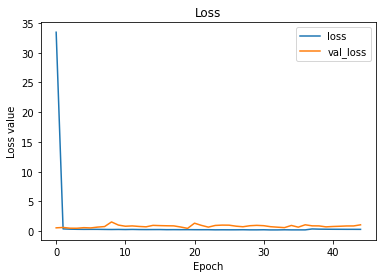

In [34]:
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

#CEK AKURASINYA

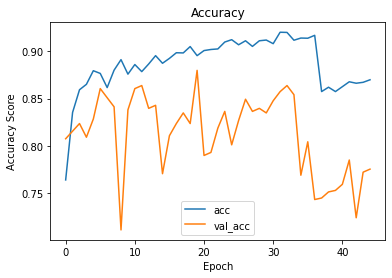

In [35]:
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel ('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

#MEMANGGIL KEMBALI / LOAD MODEL
UNTUK MEMPREDICT DARI FOLDER VAL / UTK MENGETEST TINGKAT AKURASI

In [37]:
model = load_model("../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray")

#PEMBUATAN CONFUSION MATRIX

In [38]:
def create_confusion_matrix (image_to_predict,actual_labels):
  test_predictions = np.round(model.predict(image_to_predict))

  cm = confusion_matrix(actual_labels,test_predictions)

  plt.figure(figsize=(6,6))
  plt.title('Confusion Matrix on test data')
  sns.heatmap(cm,annot=True, fmt='d',
              cmap=plt.cm.Blues, cbar=False,annot_kws={'size':14})
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

#PANGGIL KEMBALI CONFUSION MATRIX UNTUK X_TRAIN DAN Y_TRAIN
Di dalam Confusion Matrix, terdapat empat istilah yang digunakan sebagai representasi hasil proses klasifikasi , yaitu True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN).

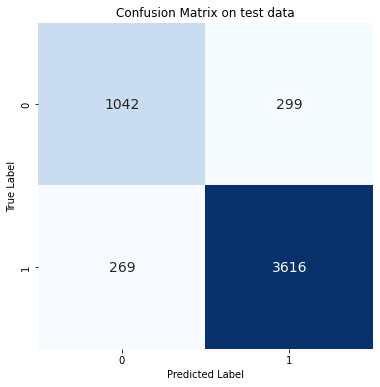

In [39]:
create_confusion_matrix(X_train,y_train)

# PANGGIL CONFUSION MATRIX UNTUK X_TEST DAN Y_TEST

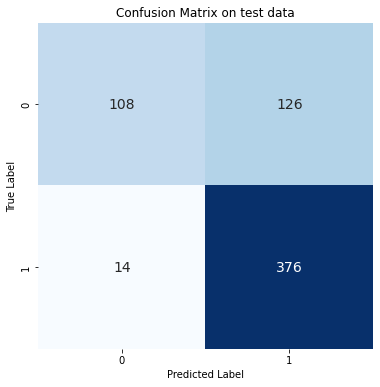

In [40]:
create_confusion_matrix(X_test,y_test)

#LOAD MODEL DATASET VAL

In [44]:
manual_test_normal = load_images("../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/val/NORMAL/")
manual_test_pneu= load_images("../content/gdrive/MyDrive/PNEUMONIA/Pneumonia or normal - neural network/pneumonia/chest_xray/val/PNEUMONIA/")

100%|██████████| 8/8 [00:01<00:00,  4.85it/s]


#MEMBUAT PREDICT NYA

In [45]:
manual_pred_normal = np.round(model.predict(manual_test_normal))
manual_pred_pneu= np.round(model.predict(manual_test_pneu))

#MENAMPILKAN HASIL PREDICT UNTUK NORMAL
Jika 0 Normal dan 1 ada indikasi terkena pneumonia

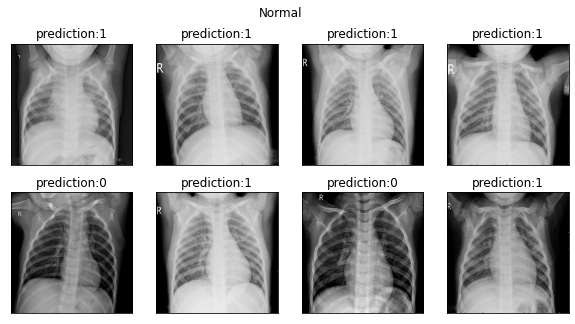

In [46]:
fig, axes = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(10,5))

plt.suptitle('Normal')
index = 0
for i in range(2):
  for j in range(4):
    axes[i,j].set_title('prediction:' + str(int(manual_pred_normal[index][0])))
    axes[i,j].imshow(manual_test_normal[index], cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

#MENAMPILKAN HASIL PREDICT YANG TERINDIKASI PNEUMONIA

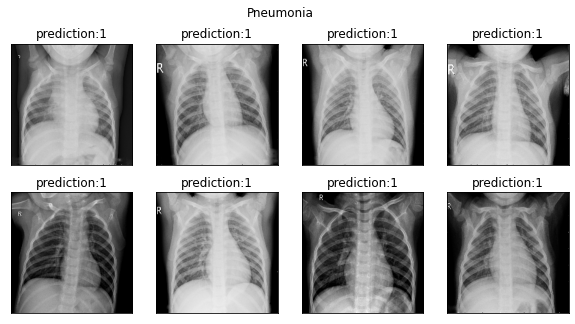

In [47]:
fig, axes = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(10,5))

plt.suptitle('Pneumonia')
index = 0
for i in range(2):
  for j in range(4):
    axes[i,j].set_title('prediction:' + str(int(manual_pred_pneu[index][0])))
    axes[i,j].imshow(manual_test_normal[index], cmap='gray')
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()